1. Метрики бинарной классификации
    - precision, recall
    - ROC AUC
    - F1
    
2. Деревья решений для классификации (продолжение)
    - Gini impurity index
    - Information gain
    - Деревья решений для регресии

3. *Понятие слабого эстиматора. Ансамбли.

------



# 1. Метрики бинарной классификации: Матрица ошибок

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [6]:
!pwd

/home/anvar/ml_ds_materials/trees/dt


In [7]:
data_train = pd.read_csv('../../_data/titanic/train.csv', index_col=0)
data_test = pd.read_csv('../../_data/titanic/test.csv', index_col=0)

num_features = ['Age', 'Fare', 'SibSp', 'Parch']

data = data_train[num_features]
X_train, X_test, y_train, y_test = train_test_split(data, data_train.Survived.values,
                                                    shuffle=True, random_state=337)

mean_age = np.round(X_train.Age.mean(), 3)
mean_fare = np.round(X_train.Fare.mean(), 3)

X_train['Age'].fillna(mean_age, inplace=True)
X_test['Age'].fillna(mean_age, inplace=True)
X_test['Fare'].fillna(mean_fare, inplace=True)

/home/anvar/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [8]:
data_train.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [9]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data_train.loc[2]

Survived                                                    1
Pclass                                                      1
Name        Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                    female
Age                                                        38
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17599
Fare                                                  71.2833
Cabin                                                     C85
Embarked                                                    C
Name: 2, dtype: object

In [11]:
data_train.iloc[2]

Survived                         1
Pclass                           3
Name        Heikkinen, Miss. Laina
Sex                         female
Age                             26
SibSp                            0
Parch                            0
Ticket            STON/O2. 3101282
Fare                         7.925
Cabin                          NaN
Embarked                         S
Name: 3, dtype: object

In [12]:
KNN = KNeighborsClassifier(5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
y_pred_proba = KNN.predict_proba(X_test)

In [13]:
print(confusion_matrix(y_test, y_pred))

[[100  33]
 [ 48  42]]


##  Матрица ошибок (Confusion matrix)

![cmat1](confusion_matrix.png)

**Basic terminology**

- **True Positives (TP):** мы *верно* предсказали что человек выжил
- **True Negatives (TN):** мы *верно* предсказали что человек НЕ выжил
- **False Positives (FP):** мы *НЕ верно* предсказали что человек выжил (Ошибка I рода, ложно-положительная)
- **False Negatives (FN):** мы *НЕ верно* предсказали что человек НЕ выжил (Ошибка II рода, ложно-отрицательная)

#### Сохраним TP, FP, TN, FN

In [14]:
cmat = confusion_matrix(y_test, y_pred)
TP, TN, FP, FN = cmat[1, 1], cmat[0, 0], cmat[0, 1], cmat[1, 0]

In [15]:
cmat

array([[100,  33],
       [ 48,  42]])

In [16]:
y_test.sum()

90

In [17]:
def print_confusion(cmat=cmat):
    TP, TN, FP, FN = cmat[1, 1], cmat[0, 0], cmat[0, 1], cmat[1, 0]
    
    print('__________________________________________________________\n')
    print('               Predicted "0"            Predicted "1"')
    print('__________________________________________________________\n')
    print('Condition "0" True Negative            False Positive\n')
    print('                   {}                        {}'.format(TN, FP))
    print('__________________________________________________________\n')
    print('Condition "1" False Negative           True Positive\n')
    print('                   {}                        {}'.format(FN, TP))
    print('__________________________________________________________')

In [18]:
print_confusion(cmat)

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   100                        33
__________________________________________________________

Condition "1" False Negative           True Positive

                   48                        42
__________________________________________________________


#### Удобно считать если есть соответствующий pandas.DataFrame

In [19]:
cmatrix = pd.DataFrame(data=y_test, columns=['True value'])
cmatrix['Predicted value'] = y_pred

pd.crosstab(index=cmatrix['True value'], columns=cmatrix['Predicted value'], margins='all')

Predicted value,0,1,All
True value,,,
0,100,33,133
1,48,42,90
All,148,75,223


##  Метрики получаемые из Confusion Matrix

1. **Accuracy**
2. Sensitivity (=True Positive Rate, Recall)
3. Specificity
4. Precision
4. ~~AUC ROC~~
5. ~~AUC PR~~
6. F1-score



----

**Accuracy**: Доля объектов чьи метки были предсказаны верно 


In [20]:
accuracy = (TP + TN) / (TP + FP + FN + TN)
print(accuracy)

0.6367713004484304


----

**Misclassification rate = 1 - Accuracy**: Доля объектов чьи метки были предсказаны НЕ верно

In [21]:
error_rate = 1 - (TP + FP) / (TP + FP + FN + TN)
print(error_rate)

0.663677130044843


----

**Sensitivity**: доля положительных результатов, которые правильно идентифицированы как положительные 
* Насколько классификатор *чувствителен* к обнаружению положительных примеров (примеров класса 1). Другие названя: True Positive Rate, **Recall**

In [22]:
print_confusion()

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   100                        33
__________________________________________________________

Condition "1" False Negative           True Positive

                   48                        42
__________________________________________________________


In [23]:
sensitivity = TP / (TP + FN)
print(sensitivity)

0.4666666666666667


------

**Specificity**: доля отрицательных результатов, которые правильно идентифицированы как отрицательные


In [24]:
print_confusion()

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   100                        33
__________________________________________________________

Condition "1" False Negative           True Positive

                   48                        42
__________________________________________________________


In [25]:
specificity = TN / (TN + FP)
print(specificity)

0.7518796992481203


-----

**Precision** доля верно предсказанных положительных результатов
* Какую часть 1 классификатор предсказал верно (от числа всех 1)?

In [26]:
print_confusion()

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   100                        33
__________________________________________________________

Condition "1" False Negative           True Positive

                   48                        42
__________________________________________________________


In [27]:
precision = TP / (TP + FP)
print(precision)

0.56


ПОПРАВИТЬ В ТАБЛИЦЕ НИЖЕ RECALL & TPR


### На какую метрику ориентироваться?

* Выбор метрики зависит от конкретной прикладной задачи:
    * Спам-фильтр (**Класс 1 - Спам**): *False negative* (спам проходит) приемлимо, а вот *False positive* (реальное письмо отфильтровывается) совершенно неприемлимо.
    * Детекция подозрительной банковской операции (**Класс 1 - Операция проведена злоумышленниками**): *False positive* (операция клиента заблокирована) приемлимо, а вот *False negative* (операция проведенная злоумышленниками пропущена) совершенно неприемлимо.
    
### Окей, как нам максимизировать/минимизировать какую то из этих ошибок если у нас есть конкретный классификатор?

## Выбор порогового значения предсказания (threshold)

Мы разобрали что такое Матрица ошибок (**Confusion Matrix**) и она строится на основе вектора предсказанных классов однако все классификаторы с которыми мы познакомились умеют для всякого нового объекта предсказывать **вероятность** его принадлежности тому или иному классу (в sklearn это реализовано ввиде метода *.predict_proba()*).

* Например Метод **k Ближайших Соседей** (KNN) на этапе предсказания смотрит на метки соседей и вероятность принадлежности классу 1 равна доле соседей с меткой 1, а вероятность принадлежности классу 0 - доле соседей с меткой 0.
* Метод **Решающего дерева** смотрит на долю объектов в листе в который попал тестовый объект.
* Метод **Логистической регрессии** смотрит на взвешенное расстояние до решающей гиперплоскости (взвешенное с помощью логистической функции).

и так далее.

Для получения предсказания класса вектор вероятности обрубается по порогу (threshold, $t$). По умолчанию используется пороговое значение 
$$
t = 0.5
$$

Т.е. 

$$
y(x)=\left\{
                \begin{array}{ll}
                  1, x \geq 0.5\\
                  0, x < 0.5
                  \end{array}
              \right.
$$


**ОДИН И ТОТ ЖЕ** вектор вероятностей при использовании разных $t$ может приводить к **РАЗНЫМ** векторам предсказаний классов, например:

$$
[0.3, 0.55, 0.6, 0.8] \rightarrow [0, 1, 1, 1]
$$

при использовании порога $0.5$, и:

$$
[0.3, 0.55, 0.6, 0.8] \rightarrow [0, 0, 0, 1]
$$

при использовании порога $0.7$

Что в результате повлияет на значения в Матрице ошибок и на все метрики котрые считаются на ее основе:

In [28]:
def cmatrix_at_treshold(y_true, y_predicted_proba, threshold=.5):
    return confusion_matrix(y_true,
                            np.where(y_predicted_proba[:, 1] >= threshold, 1, 0))

In [29]:
cmat50 = cmatrix_at_treshold(y_test, y_pred_proba, threshold=.5)
cmat25 = cmatrix_at_treshold(y_test, y_pred_proba, threshold=.25)
cmat75 = cmatrix_at_treshold(y_test, y_pred_proba, threshold=.75)
cmat100 = cmatrix_at_treshold(y_test, y_pred_proba, threshold=1)
cmat0 = cmatrix_at_treshold(y_test, y_pred_proba, threshold=0)

In [30]:
print_confusion(cmat0)

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   0                        133
__________________________________________________________

Condition "1" False Negative           True Positive

                   0                        90
__________________________________________________________


In [31]:
cmat0

array([[  0, 133],
       [  0,  90]])

In [32]:
cmat25

array([[79, 54],
       [34, 56]])

In [33]:
cmat50

array([[100,  33],
       [ 48,  42]])

In [34]:
cmat75

array([[121,  12],
       [ 64,  26]])

In [35]:
cmat100

array([[130,   3],
       [ 85,   5]])

Входные данные:

* 223 объекта
    * 133 класса "0"
    * 90 класса "1"

Что происходит с нашей **Матрицей ошибок** при увеличении threshold ?

---

1. threshold = 0. Все наблюдения предсказываются как класс "1":
    * **False Positive** = 133
    * **True Positive** = 90
    * **True Negative** = 0
    * **False Negative** = 0
    * Specificity = $\frac{TN}{TN + FP} = 0$
    * Sensitivity = $\frac{TP}{TP + FN} = 1$
    
---
    
2. threshold = 0.25. Какая-то часть объектов начинает предсказываться как "0":
    * **False Positive** = 54
    * **True Positive** = 56
    * **True Negative** = 79
    * **False Negative** = 34
    * Specificity = $\frac{TN}{TN + FP} = 0.59$
    * Sensitivity = $\frac{TP}{TP + FN} = 0.64$
---
    
3. threshold = 0.75. Увеличивая пороговое значение мы уменьшаем число объектов предсказываемых как "1" и увеличиваем число объектов предсказываемых как 0:
    * **False Positive** = 12
    * **True Positive** = 26
    * **True Negative** = 121
    * **False Negative** = 64
    * Specificity = $\frac{TN}{TN + FP} = 0.9$
    * Sensitivity = $\frac{TP}{TP + FN} = 0.3$
    
    
---
    
4. threshold = 1. Наконец все объекты (за исключением тех, которые предсказаны классом "1" c *вероятностью* 1) предсказываются классом "0":
    * **False Positive** = 3
    * **True Positive** = 5
    * **True Negative** = 130
    * **False Negative** = 85
    * Specificity = $\frac{TN}{TN + FP} = 0.98$
    * Sensitivity = $\frac{TP}{TP + FN} = 0.05$
    
Таким образом балансируя пороговое значение мы можем получать классификаторы с разными **чувствительностью и специфичностью** . 

------

Кривая изменения **Чувствительности** и **Специфичности** в зависимости от выбранного порога называется ROC кривой.


### ROC curve

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

In [38]:
font = {'size'   : 22} 
plt.rc('font', **font)

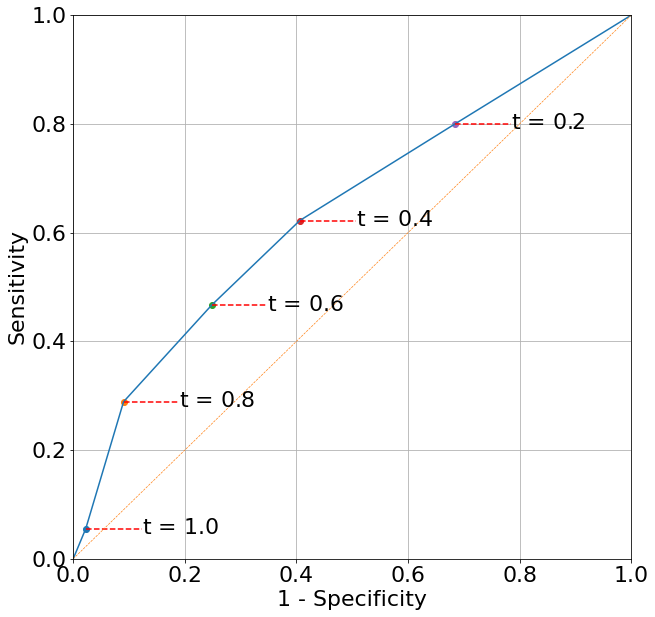

In [39]:
plt.figure(figsize=(10,10))

plt.plot(fpr, tpr)

for f,t,thresh in zip(fpr[1:-1], tpr[1:], thresholds[1:-1]):

    plt.scatter(f, t)
    plt.plot([f, f+0.1], [t, t], ls='--', c='r')
    plt.text(f+.1, t-.01, 't = ${:.1f}$'.format(thresh))

plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity');
plt.plot([0,1], [0,1], ls='--', lw=.66)
plt.grid()
plt.xlim([0, 1])
plt.ylim([0,1]);

# plt.text()

Уменьшая пороговое значение мы движемся по этой кривой слева - направо, снизу - вверх.
Часто бывает что необходимо чтобы классификатор достигал определенного уровня Sensitivity или определенного уровня
Specificity этого можно достичь выбрав соответствующий порог предсказания.



----


## AUC ROC

Несмотря на то что пороговое значение влияет на величины Чувствительности и Специфичности, одна величина на этом
графике остается неизменной - Площадь под графиком.

Площадь под ROC кривой носит название ROC AUC (или AUC ROC):

Area Under the Curve Reciever Operator Characteristic

https://people.inf.elte.hu/kiss/13dwhdm/roc.pdf

In [40]:
from sklearn.metrics import roc_auc_score

In [41]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.6399331662489558

------


Метрика которая в некотором смысле балансирует между Precision и Recall (Specificity) назвается

### F1-score

И это просто Гармоническое среднее Precision и Recall:

$$
F_1 = 2\times \frac{\text{Precision} \times \text{Recall}}{\text{Precision}+\text{Recall}}
$$


Ее легко обобщить для того чтобы учитывать одну из характеристик сильнее другой:

$$
F_1 = (1 + \beta^2)\times \frac{\text{Precision} \times \text{Recall}}{\beta^2 \times\text{Precision}+\text{Recall}}
$$


https://en.wikipedia.org/wiki/F1_score

-----

Аналог ROC кривой но уже изменение Precision и Recall при изменении параметра порога (**threshold**) носит название Precision Recall кривой, и конечно есть метрика Площадь под PR кривой

### AUC PR

Сравнительный анализ ROC и PR кривых можно найти в этом посте

http://www.chioka.in/differences-between-roc-auc-and-pr-auc/

Подробный разбор в этой статье

http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf

------

Хорошее объяснение вышеперечисленных метрик, а так же дополнительные материалы можно найти здесь
https://www.youtube.com/watch?v=85dtiMz9tSo

а так же в нотбуке к видео https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

# 2. Деревья решений для классификации (продолжение)

На прошлом занятии мы разобрали идею Деревьев решений:

![DecisionTree](tree1.png)


Давайте теперь разберемся **как происходит разделения в каждом узле** то есть как проходит этап **обучения модели**. Есть как минимум две причины в этом разобраться : во-первых это позволит нам решать задачи классификации на 3 и более классов, во-вторых это даст нам возможность считать *важность* признаков в обученной модели.

Для начала посмотрим какие бывают деревья решений


----
Дерево решений вообще говоря **не обязано быть бинарным**, на практике однако используются именно бинарные деревья, поскольку для любоого не бинарного дерева решений **можно построить бинарное** (при этом увеличится глубина дерева).

### 1. Деревья решений использую простой одномерный предикат для разделения объектов

Имеется ввиду что в каждом узле разделение объектов (и создание двух новых узлов) происходит **по 1 (одному)** признаку: 

*Все объекты со значением некоторого признака меньше трешхолда отправляются в один узел, а больше - в другой:*

$$
[x_j < t]
$$

Вообще говоря это совсем не обязательно, например в каждом отдельном узле можно строить любую модель (например логистическую регрессию или KNN), рассматривая сразу несколько признаков.

### 2. Оценка качества 

Мы говорили про простой функционал качества разбиения (**выбора трешхолда**): количество ошибок (1-accuracy). 
На практике используются два критерия: Gini's impurity index и Information gain.

**Индекс Джини**
$$
I_{Gini} = 1 - \sum_i^K p_i^2 
$$

где $K$ - количество классов, a $p_i = \frac{|n_i|}{n}$ - доля представителей $i$ - ого класса в данном узле


**Энтропия**

$$
H(p) = - \sum_i^K p_i\log(p_i)
$$

**Информационный критерий**
$$
IG(p) = H(\text{parent}) - H(\text{child})
$$


#### Разделение производится по тому трешхолду и тому признаку по которому взвешенное среднее функционала качества в узлах потомках наименьшее.


### 3. Критерий остановки

Мы с вами говорили о таких параметрах Решающего дерева как минимальное число объектов в листе,
и минимальное число объектов в узле, для того чтобы он был разделен на два. Еще один критерий - 
глубина дерева. Возможны и другие.

* Ограничение числа объектов в листе
* Ограничение числа объектов в узле, для того чтобы он был разделен
* Ограничение глубины дерева
* Ограничение минимального прироста Энтропии или Информационного критерия при разделении
* Остановка в случае если все объекты в листе принадлежат к одному классу

На прошлой лекции мы обсуждали технику которая называется **Прунинг** (pruning) это альтернатива Критериям остановки, когда сначала строится переобученное дерево, а затем она каким то образом упрощается. На практике по ряду причин чаще используются критерии остановки, а не прунинг.

Подробнее см. https://github.com/esokolov/ml-course-hse/blob/master/2018-fall/lecture-notes/lecture07-trees.pdf

Оссобенности разбиения непрерывных признаков
* http://kevinmeurer.com/a-simple-guide-to-entropy-based-discretization/
* http://clear-lines.com/blog/post/Discretizing-a-continuous-variable-using-Entropy.aspx
---

## 2.1. Оценка качества разделения в узле

In [42]:
def gini_impurity(y_current):
    
    n = y_current.shape[0]
    val, count = np.unique(y_current, return_counts=True)
    gini = 1 - ((count/n)**2).sum()
        
    return gini

def entropy(y_current):
    
    gini = 1
    n = y_current.shape[0]
    val, count = np.unique(y_current, return_counts=True)
    p = count/n
    igain = p.dot(np.log(p))
    
    return igain

In [43]:
n = 100
Y_example = np.zeros((100,100))

for i in range(100):
    for j in range(i, 100):
        Y_example[i, j] = 1
        
gini = [gini_impurity(y) for y in Y_example]
ig = [-entropy(y) for y in Y_example]

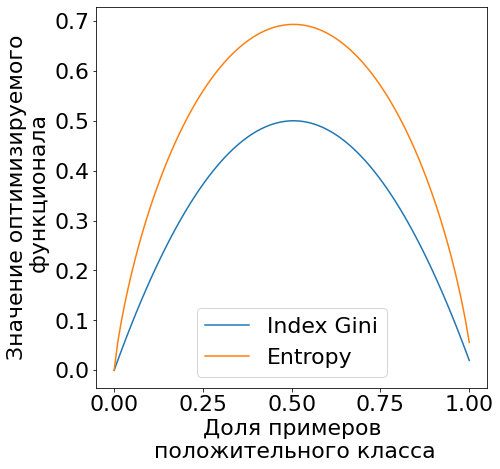

In [44]:
plt.figure(figsize=(7,7))

plt.plot(np.linspace(0,1,100), gini, label='Index Gini');
plt.plot(np.linspace(0,1,100), ig, label ='Entropy');
plt.legend()
plt.xlabel('Доля примеров\n положительного класса')
plt.ylabel('Значение оптимизируемого\n функционала');

## 2.2. Пример работы Решающего дерева

**Индекс Джини** и **Информационный критерий** это меры сбалансированности вектора (насколько значения объектов в наборе однородны). Максимальная неоднородность когда объектов разных классов поровну. Максимальная однородность когда в наборе объекты одного класса. 

Разбивая множество объектов на два подмножества, мы стремимся уменьшить неоднородность в каждом подмножестве.
Посмотрем на примере Ирисов Фишера

### Ирисы Фишера

In [45]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


iris = load_iris()
model = DecisionTreeClassifier()
model = model.fit(iris.data, iris.target)

In [46]:
feature_names = ['sepal length', 'sepal width',  'petal length',  'petal width']
target_names = ['setosa', 'versicolor', 'virginica']

In [47]:
model.feature_importances_

array([0.01333333, 0.01333333, 0.55072262, 0.42261071])

In [45]:
np.array(model.decision_path(iris.data).todense())[0]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
np.array(model.decision_path(iris.data).todense())[90]

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [49]:
model.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
model.tree_.node_count

17

### Цифры. Интерпретируемость

In [51]:
from sklearn.datasets import load_digits

X, y = load_digits(n_class=2, return_X_y=True)

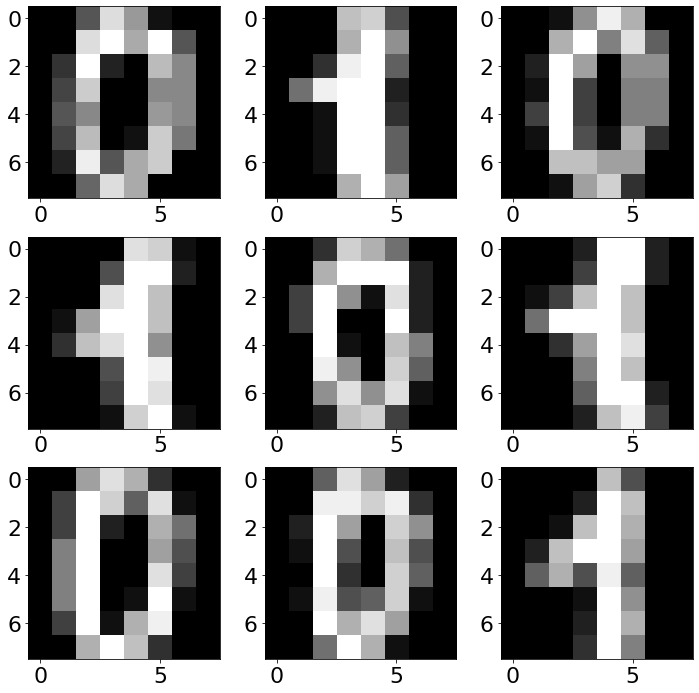

In [52]:
plt.figure(figsize=(12,12))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    ax.imshow(X[i].reshape(8,8), cmap='gray')

In [53]:
model = DecisionTreeClassifier()
model.fit(X, y)
y_pred = model.predict(X)

print(accuracy_score(y, y_pred))
print(X.shape)

1.0
(360, 64)


In [54]:
np.array(model.decision_path(X).todense())[0]

array([1, 1, 0, 1, 0])

In [55]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.95652699, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04347301, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

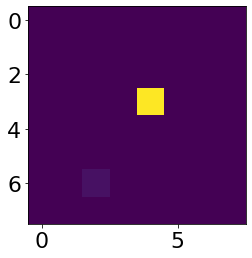

In [56]:
plt.imshow(model.feature_importances_.reshape(8,8));

In [57]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree.dot', filled=True)

In [60]:
# #sudo apt-get install graphviz

# !dot -Tpng 'tree.dot' -o 'tree.png'

# ![Iris_tree](tree.png)

In [61]:
np.array(model.decision_path(X).todense())[0]

array([1, 1, 0, 1, 0])

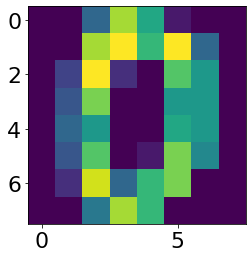

In [62]:
plt.imshow(X[0].reshape(8,8))

## 2.3. Решающие деревья легко обобщаются на задачу многоклассовой классификации

### Пример с рукописными цифрами

In [63]:
X, y = load_digits(n_class=10, return_X_y=True)

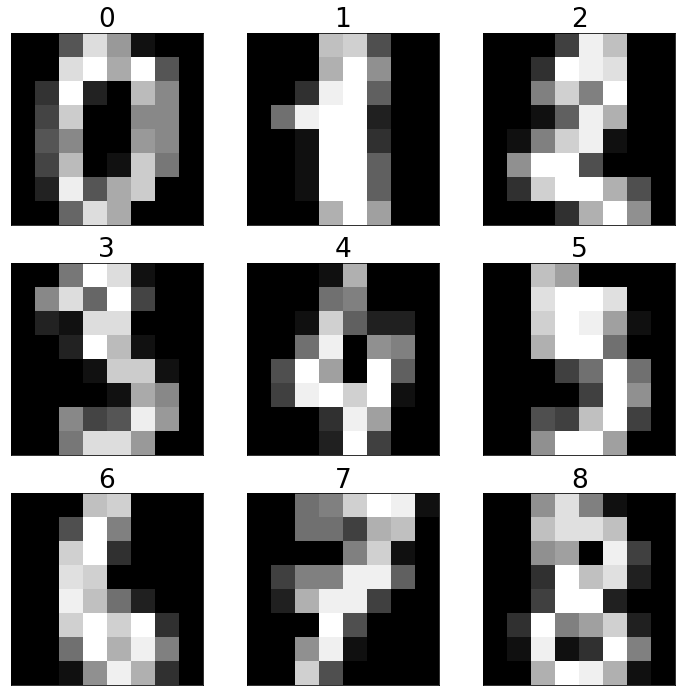

In [64]:
plt.figure(figsize=(12,12))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    ax.imshow(X[i].reshape(8,8), cmap='gray')
    ax.set_title(y[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [65]:
model = DecisionTreeClassifier()
model.fit(X, y)
y_pred = model.predict(X)

print(accuracy_score(y, y_pred))

1.0


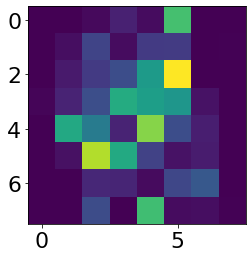

In [66]:
plt.imshow(model.feature_importances_.reshape(8,8));

In [68]:
model.feature_importances_

array([0.        , 0.        , 0.00210232, 0.00799499, 0.00280725,
       0.06148264, 0.        , 0.        , 0.        , 0.00328898,
       0.01776405, 0.00300528, 0.01474043, 0.01501789, 0.        ,
       0.00061833, 0.        , 0.00622264, 0.01492878, 0.02059102,
       0.047594  , 0.08725831, 0.        , 0.        , 0.0012193 ,
       0.00855944, 0.02099497, 0.05361479, 0.04889383, 0.04569278,
       0.00428904, 0.        , 0.        , 0.05271335, 0.03632829,
       0.00877746, 0.07140602, 0.0207647 , 0.00731744, 0.        ,
       0.        , 0.00404258, 0.07713712, 0.05306815, 0.0173373 ,
       0.00440765, 0.00667371, 0.        , 0.        , 0.        ,
       0.00961093, 0.00903023, 0.00267943, 0.01850322, 0.0240409 ,
       0.        , 0.        , 0.        , 0.02017294, 0.        ,
       0.06042786, 0.00289584, 0.00336548, 0.00061833])

### Вопрос: откуда мы получаем feature importance?

## 2.4. Пример на котором дерево решений строит очень сложную разделяющую кривую

Пример взят отсюда https://habr.com/ru/company/ods/blog/322534/#slozhnyy-sluchay-dlya-derevev-resheniy .

Как мы помним Деревья используют одномерный предикат для разделени множества объектов.
Это значит что если данные плохо разделимы по **каждому** (индивидуальному) признаку по отдельности, результирующее решающее правило может оказаться очень сложным.

In [69]:
from sklearn.tree import DecisionTreeClassifier

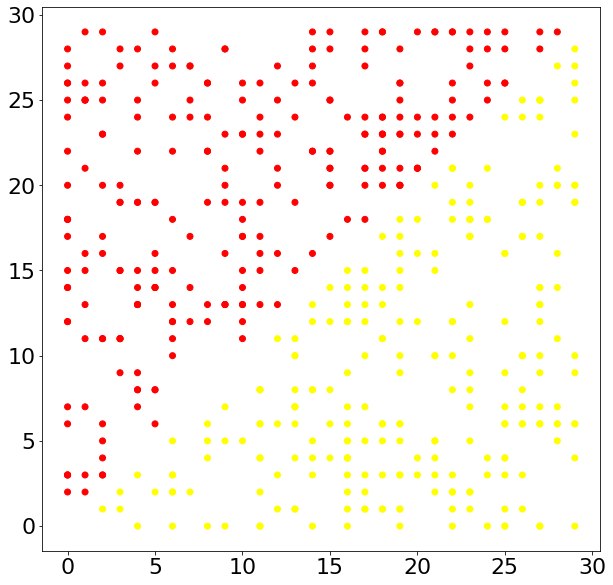

In [70]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)

        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn');

Давайте посмотрим как данные выглядит в проекции на 1 ось

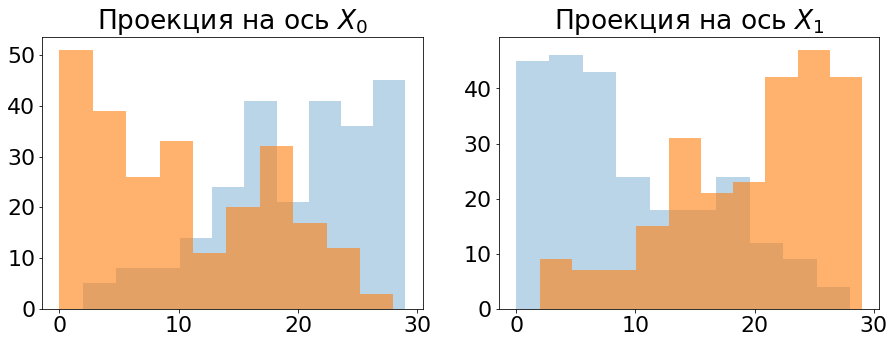

In [71]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('Проекция на ось $X_0$')
ax1.hist(X[y==1, 0], alpha=.3);
ax1.hist(X[y==-1, 0], alpha=.6);

ax2 = plt.subplot(1,2,2)
ax2.set_title('Проекция на ось $X_1$')
ax2.hist(X[y==1, 1], alpha=.3);
ax2.hist(X[y==-1, 1], alpha=.6);


In [72]:
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps),
                         np.arange(y_min, y_max, eps))

<ipython-input-73-7799b03e2b13>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn', alpha=0.3)


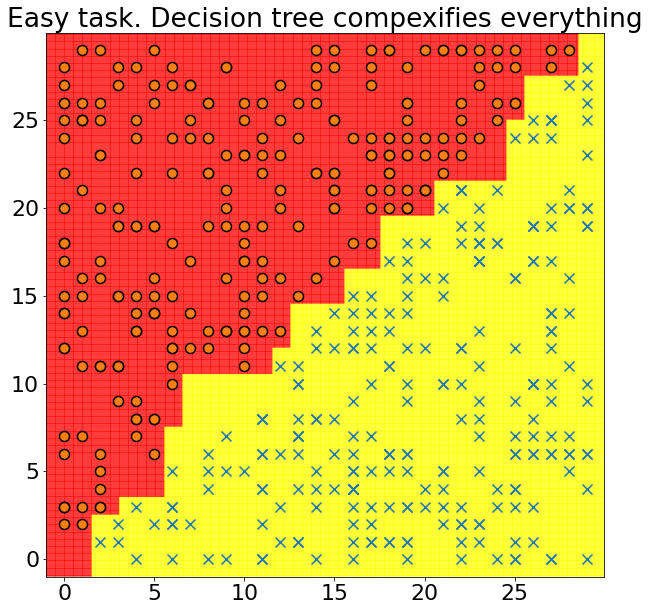

In [73]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)


xx, yy = get_grid(X, eps=.05)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, predicted, cmap='autumn', alpha=0.3)
plt.scatter(X[y==1, 0], X[y==1, 1], marker='x', s=100, cmap='autumn',  linewidth=1.5)
plt.scatter(X[y==-1, 0], X[y==-1, 1], marker='o', s=100, cmap='autumn', edgecolors='k',linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything');

In [74]:
# export_graphviz(tree, out_file='complex_tree.dot', filled=True)
# !dot -Tpng 'complex_tree.dot' -o 'complex_tree.png'

## 2.5. Деревья решений для регрессии (кратко)

см. sklearn.DecisionTreeRegressor

# 3. Ансамблирование деревьев. Случайный лес.

### Идея 1

Что если у нас несколько классификаторов (каждый может быть не очень *умным*) ошибающихся на разных объектах
Тогда если в качестве предсказания мы будем использовать *моду* мы можем расчитывать на лучшую предсказательную силу.

### Идея 1

Как получить модели которые ошибаются в разных местах?

Давайте брать *тупые* деревья но учить их на **разных подвыборках признаков** !

In [75]:
from sklearn.datasets import load_digits

X, y = load_digits(n_class=2, return_X_y=True)

In [76]:
for state in range(5):

    model = DecisionTreeClassifier(max_features=4, max_depth=2, random_state=state)
    model.fit(X, y)
    y_pred = model.predict(X)

    print('Точность классификатора: {:.3f}'.format(accuracy_score(y, y_pred)))
    
    
    print('Ненулевые признаки: {}'.format(np.nonzero(model.feature_importances_)))
    print('\n-------\n')

Точность классификатора: 0.947
Ненулевые признаки: (array([10, 33, 35]),)

-------

Точность классификатора: 0.794
Ненулевые признаки: (array([21, 33, 51]),)

-------

Точность классификатора: 0.939
Ненулевые признаки: (array([18, 44, 49]),)

-------

Точность классификатора: 0.997
Ненулевые признаки: (array([28, 59]),)

-------

Точность классификатора: 0.922
Ненулевые признаки: (array([10, 29, 36]),)

-------



In [77]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.58780383, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.31468559,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.09751057, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

### Идея 2

Как получить модели которые ошибаются в разных местах?

Давайте брать *тупые* деревья, но учить их на **разных подвыборках объектов** !

### Результат: Случайный лес.

sklearn.ensemble RandomForrest